In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn # For heat map
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [6]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#Hence, no null values are present 

In [9]:
df.drop(['Id'],axis = 1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


{'whiskers': [<matplotlib.lines.Line2D at 0x7f51cf58c880>,
 'caps': [<matplotlib.lines.Line2D at 0x7f51cf58ce20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f51cf58c5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f51ced8f400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f51ced8f6d0>],
 'means': []}

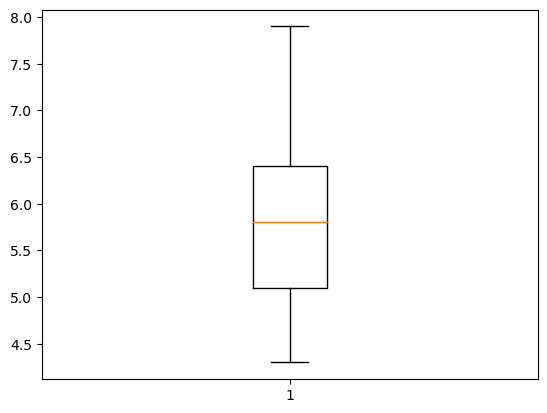

In [10]:
plt.boxplot(df['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f51cec7cbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f51cec8c0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f51cec7c9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f51cec8c640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f51cec8c910>],
 'means': []}

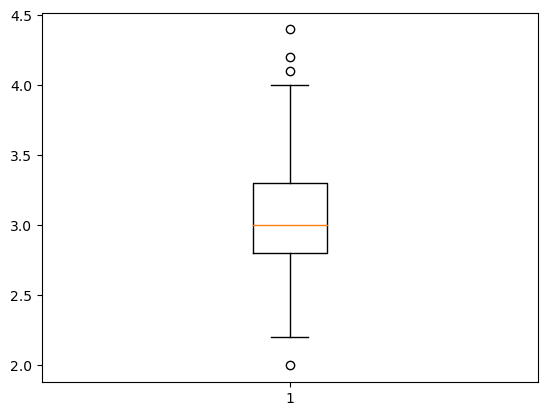

In [11]:
plt.boxplot(df['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f51cec6f400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f51cec6f940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f51cec6f130>],
 'medians': [<matplotlib.lines.Line2D at 0x7f51cec6fee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f51cebfc1f0>],
 'means': []}

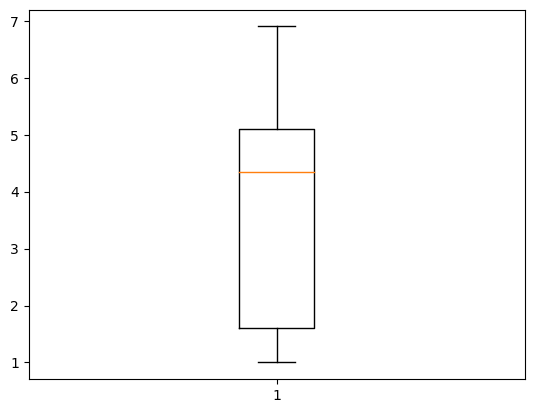

In [12]:
plt.boxplot(df['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f51cebdc4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f51cebdc970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f51cebdc250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f51cebdcf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f51cebe8220>],
 'means': []}

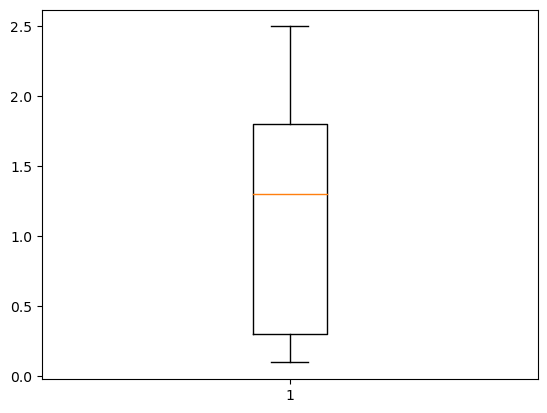

In [13]:
plt.boxplot(df['PetalWidthCm'])

In [14]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
df['zscore'] = ((df.SepalWidthCm - df.SepalWidthCm.mean())/df.SepalWidthCm.std())
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.259242


In [16]:
print("The outliers are: ")
df[ (df.zscore <-2) | (df.zscore >2)] # here -2 and 2 are hit and trail 

The outliers are: 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
14,15,5.8,4.0,1.2,0.2,Iris-setosa,2.181763
15,16,5.7,4.4,1.5,0.4,Iris-setosa,3.104284
32,33,5.2,4.1,1.5,0.1,Iris-setosa,2.412393
33,34,5.5,4.2,1.4,0.2,Iris-setosa,2.643024
60,61,5.0,2.0,3.5,1.0,Iris-versicolor,-2.430844


In [17]:
x = df[(df.zscore > -2) & (df.zscore < 2)]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.259242
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,-0.124540
146,147,6.3,2.5,5.0,1.9,Iris-virginica,-1.277692
147,148,6.5,3.0,5.2,2.0,Iris-virginica,-0.124540
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.797981


{'whiskers': [<matplotlib.lines.Line2D at 0x7f51ceb533a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f51cebb9eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f51ceb530d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f51ceb53dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f51ceb630d0>],
 'means': []}

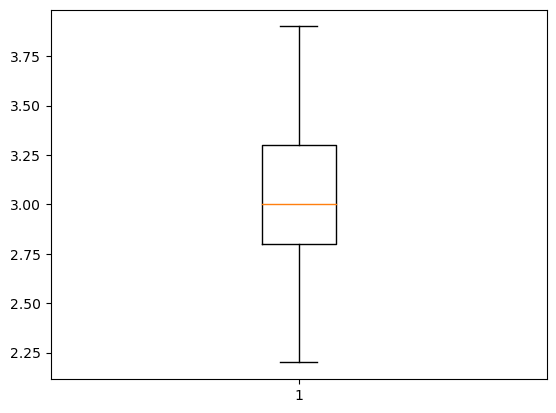

In [18]:
plt.boxplot(x['SepalWidthCm'])

In [19]:
# encoding species attribute
df.replace({'Species': {'Iris-setosa':1 , 'Iris-versicolor':2 , 'Iris-virginica' : 3}},inplace = True)


In [20]:
df['Species']

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [21]:
X = df.drop(['Species'],axis = 1)
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,zscore
0,1,5.1,3.5,1.4,0.2,1.028611
1,2,4.9,3.0,1.4,0.2,-0.124540
2,3,4.7,3.2,1.3,0.2,0.336720
3,4,4.6,3.1,1.5,0.2,0.106090
4,5,5.0,3.6,1.4,0.2,1.259242
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,-0.124540
146,147,6.3,2.5,5.0,1.9,-1.277692
147,148,6.5,3.0,5.2,2.0,-0.124540
148,149,6.2,3.4,5.4,2.3,0.797981


In [22]:
Y = df['Species']
Y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [25]:
for i in range 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1 )

In [27]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [36]:
knn.predict(x_test)

/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 2, 2, 1, 3, 2, 3, 1, 1, 3, 2, 1, 3, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 3, 2, 1, 1, 2, 3])

In [35]:
knn.score(x_test, y_test)

/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [44]:
#hypertuning using GridSearchCv

from sklearn.model_selection import GridSearchCV

# create a new model 
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n neighbors
param_grid = {"n_neighbors":np.arange(1,25)}
#use GridSearchCV to test all values
knn_gscv = GridSearchCV(knn2, param_grid,cv = 18)

#fit data into model for training 
knn_gscv.fit(X,Y)


/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kaustavsharma/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

GridSearchCV(cv=18, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [45]:
#check top performing n_neighbor value
knn_gscv.best_params_

{'n_neighbors': 1}

In [46]:
knn_gscv.best_score_   #best_score_ is a predefined attribute (attribute: a function kinda thing without ())

0.9868827160493827